In [1]:
#import autograd.numpy as np
#from autograd.scipy.integrate import odeint
#from autograd import jacobian
#from autograd.builtins import tuple
from torchdiffeq import odeint, odeint_adjoint
from torch import nn
import numpy as np
import torch as tch

#odeint(func, y0, t)
import matplotlib.pyplot as plt

#Ca0 = tch.tensor(1.0)
#k1 = k_1 = tch.tensor(3.0, dtype=t.float64)
#odeint(func, y0, t)
#tspan = tch.from_numpy(np.linspace(0, 0.5, 50))
tspan = tch.linspace(0, 0.5, 50, requires_grad=True)


def f(t,z):
    z0,z1,z2 = tch.unbind(z)
#    return tch.stack((z[0]**2 - z[1], z[1]**1, z[2]**1-z[1]) )
    return tch.stack((z0**2 - z1, z1**1, z2**1-z1) )


class Lambda(nn.Module):
    #def forward(self, t, y):
        #return torch.mm(y**3, true_A)
    def forward(self, t,z):
        return tch.sin(z)
        #z0,z1,z2 = tch.unbind(z)
        #return tch.stack((z[0]**2 - z[1], z[1]**1, z[2]**1-z[1]) )

def C(z0):
    #z0 = t.tensor(z0, dtype=t.float64, requires_grad=True )
    
    #sol = odeint(f, z0, tspan)

    return sol
z0 =[1.,2.,3.0]
z0 = tch.tensor(z0, dtype=t.float64 , requires_grad=True)
#ol = C( z0)
sol = odeint_adjoint(Lambda(), z0, tspan)
#sol = odeint(f, z0, tspan)


ModuleNotFoundError: No module named 'torchdiffeq'

In [141]:
loss = tch.sum(sol[-1])
loss.backward(tch.ones(loss.shape) )
loss.grad

In [144]:
sol.backward(tch.ones(sol.shape))
sol.grad

In [129]:
sol.grad.

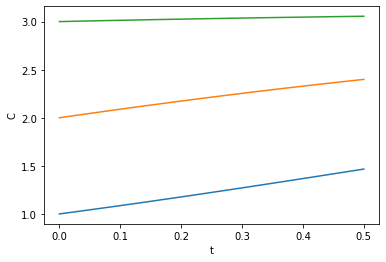

In [137]:
plt.plot(tspan.detach().numpy(), sol.detach().numpy() )
#plt.xlim([tspan.min(), tspan.max()])
plt.xlabel('t')
plt.ylabel('C');

In [92]:
#sol[-1].backward(z0)


In [93]:
L.backward(torch.ones(L.shape))

AttributeError: 'NoneType' object has no attribute 'data'

In [38]:
odeint?

Signature: odeint(func, y0, t, rtol=1e-07, atol=1e-09, method=None, options=None)
Docstring:
Integrate a system of ordinary differential equations.

Solves the initial value problem for a non-stiff system of first order ODEs:
    ```
    dy/dt = func(t, y), y(t[0]) = y0
    ```
where y is a Tensor of any shape.

Output dtypes and numerical precision are based on the dtypes of the inputs `y0`.

Args:
    func: Function that maps a Tensor holding the state `y` and a scalar Tensor
        `t` into a Tensor of state derivatives with respect to time.
    y0: N-D Tensor giving starting value of `y` at time point `t[0]`. May
        have any floating point or complex dtype.
    t: 1-D Tensor holding a sequence of time points for which to solve for
        `y`. The initial time point should be the first element of this sequence,
        and each time must be larger than the previous time. May have any floating
        point dtype. Converted to a Tensor with float64 dtype.
    rtol: optional fl

In [106]:
sol.grad_fn

In [8]:
t.tensor(5)

tensor(5)

Elapsed time = 23.8 seconds


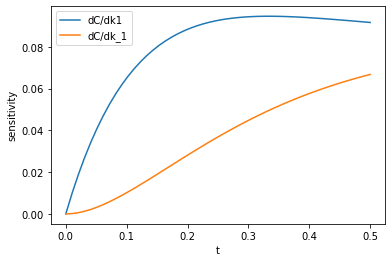

In [2]:
import time
t0 = time.time()
dCdk = jacobian(C, 0)


k_sensitivity = dCdk(np.array([k1, k_1]))

k1_sensitivity = k_sensitivity[:, 0, 0]
k_1_sensitivity = k_sensitivity[:, 0, 1]

plt.plot(tspan, np.abs(k1_sensitivity), label='dC/dk1')
plt.plot(tspan, np.abs(k_1_sensitivity), label='dC/dk_1')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('sensitivity')
print(f'Elapsed time = {time.time() - t0:1.1f} seconds')

In [4]:
import jax

ModuleNotFoundError: No module named 'jaxlib'

In [76]:
import torch
# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
z = x ** 3
z.backward() #Computes the gradient 
print(x.grad.data) #Prints '3' which is dz/dx 

tensor(3.)


# TF
test differentiating an ODE solves using "tfdiffeq".

In [15]:
import tfdiffeq as td

from tfdiffeq import odeint
#from tfdiffeq import cast_double
import tensorflow as tf
tf.keras.backend.set_floatx('float64') # Presumably can get more speed, especially on a GPU, 
#if we used float32
import numpy as np
import pylab as pl
#import torch as tch

#odeint(func, y0, t)
import matplotlib.pyplot as plt

@tf.function
def f(t, z, pars): # The actual function, dz_dt
    # y now reprents the a vector of [u, v]
    #u, v = y[0], y[1]
    
    #self.val.assign_add( 1)
    return z**2*pars* tf.exp(-z/10)
    #z0,z1,z2 = z
    #z0_dt = z[0]**2 - z[1]
    #z1_dt = pars[0]*tf.abs(t-pars[1])**2*z[1]**1
    #z2_dt = z[2]**1-z[1]
    #du_dt = v
    #dv_dt = 5 * v - 6 * u
    #return tf.stack([z0_dt, z1_dt, z2_dt])

class Lambda(tf.keras.Model):
    
    def __init__(self, pars,f): #pars are parameters to the ode
        self.pars=pars
        self.Nevals = tf.Variable(0)#tf.convert_to_tensor(0, dtype=tf.int64)
        self.f = tf.function(f)
        super().__init__()
    
    @tf.function
    def call(self, t, z):
        self.Nevals.assign_add(1)
        return self.f(t,z,self.pars)
        #self.val.assign_add( 1)
        #return z**2*self.pars* tf.exp(-z/10)*t
        
#     def call(self, t, z): # The actual function, dz_dt
#         #return f(t,z, self.pars)
#         # y now reprents the a vector of [u, v]
#         #u, v = y[0], y[1]
#         #z0,z1,z2 = z
#         z0_dt = z[0]**2 - z[1] 
#         z1_dt = self.pars[0]*tf.abs(t-self.pars[1])**2*z[1]**1
#         z2_dt = z[2]**1-z[1]
#         #du_dt = v
#         #dv_dt = 5 * v - 6 * u
#         self.val.assign_add( 1)
#         return tf.stack([z0_dt, z1_dt, z2_dt])
    
    #return tf.stack([du_dt, dv_dt])  # vector of shape [2]


In [16]:
with tf.device("/cpu:0"):
    tspan = tf.linspace(0.0, 5.0, 400)
    z0 = tf.linspace(0,2,1000) # initial values
    z0 = tf.convert_to_tensor(z0, dtype=tf.float64)
    p0 = tf.linspace(-4, 4,1000) #parameters for the ODE
    p0 = tf.convert_to_tensor(p0, dtype=tf.float64)
    ode = Lambda(p0, f)
    #tspan =td.cast_double(tspan)
    #ol = C( z0)
    %time sol = odeint(ode, z0, tspan, method='dopri5')
    #sol = odeint(f, z0, tspan)
    #L = tf.reduce_sum(sol[-1])

CPU times: user 688 ms, sys: 3 ms, total: 691 ms
Wall time: 715 ms


In [3]:

    
with tf.device("/cpu:0"):
    with tf.GradientTape() as g:
        g.watch(p0)
        ode = Lambda(p0)

        #g.watch(z0)
        
        #tspan = tf.linspace(0.0, 2, 1000)
        #tspan =td.cast_double(tspan)
        #ol = C( z0)
        %time sol = odeint(ode, z0, tspan, method='adams')
        #sol = odeint(f, z0, tspan)
        L = tf.reduce_sum(sol[-1])


TypeError: __init__() missing 1 required positional argument: 'f'

In [ ]:
ode.val

In [79]:
L

<tf.Tensor: shape=(), dtype=float64, numpy=37932.76585269482>

In [82]:
%time dsol_dz = g.gradient(L, p0)

CPU times: user 2.67 s, sys: 64.8 ms, total: 2.73 s
Wall time: 2.51 s


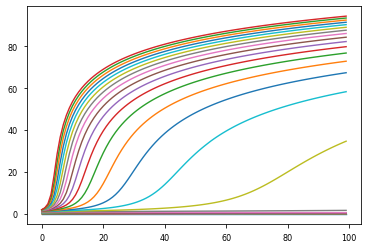

In [80]:
pl.plot(sol[:,::30])

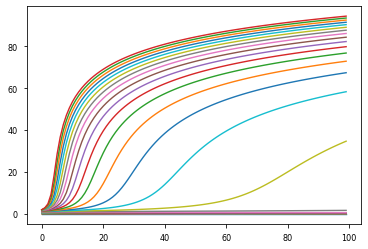

In [76]:
pl.plot(sol[:,::30])

In [69]:
#pl.plot(sol)

In [83]:
dsol_dz

<tf.Tensor: shape=(1000,), dtype=float64, numpy=
array([ 0.00000000e+00,  7.34075084e+03,  8.58407524e+04,  3.30432847e+05,
        8.18119238e+05,  1.60137469e+06,  2.71170689e+06,  4.16399596e+06,
        5.95996869e+06,  8.09075296e+06,  1.05387291e+07,  1.32788861e+07,
        1.62798363e+07,  1.95045950e+07,  2.29111975e+07,  2.64532001e+07,
        3.00801001e+07,  3.37376967e+07,  3.73684074e+07,  4.09115525e+07,
        4.43036147e+07,  4.74784791e+07,  5.03676588e+07,  5.29005076e+07,
        5.50044235e+07,  5.66050436e+07,  5.76264322e+07,  5.79912625e+07,
        5.76209939e+07,  5.64360431e+07,  5.43559521e+07,  5.12995517e+07,
        4.71851212e+07,  4.19305447e+07,  3.54534637e+07,  2.76714270e+07,
        1.85020363e+07,  7.86309018e+06, -4.32727653e+06, -1.81504553e+07,
       -3.36872300e+07, -5.10176461e+07, -7.02208823e+07, -9.13751251e+07,
       -1.14557448e+08, -1.39843691e+08, -1.67308346e+08, -1.97024440e+08,
       -2.29063429e+08, -2.63495089e+08, -3.0038741

In [17]:
sol[-1]

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.21025278, 2.09066148, 3.77962996])>

In [4]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x) # Will compute to 6.0

In [5]:
sol

<tf.Tensor: shape=(10, 3), dtype=float64, numpy=
array([[1.        , 2.        , 3.1       ],
       [0.94080566, 2.01698345, 3.1623503 ],
       [0.87416031, 2.03199163, 3.22734861],
       [0.79990744, 2.04511868, 3.29525646],
       [0.71805308, 2.05646788, 3.36634463],
       [0.62880523, 2.06615045, 3.44089327],
       [0.53259905, 2.07428458, 3.51919197],
       [0.43011572, 2.0809944 , 3.60153989],
       [0.32228107, 2.08640896, 3.68824615],
       [0.21025278, 2.09066148, 3.77962996]])>

In [135]:
@tf.function
def f(a):
    return tf.constant(1j)*a

def tf_realify(tf_func):
    tf.print(tf_func.function_spec.input_signature)
    @tf.function
    def f_wrapped(a,b):
        return tf_func(tf.cast(a, tf.complex128)+1j*tf.cast(b, tf.complex128) )
    return f_wrapped

f2=tf_realify(f)
f2(3,1)

None


<tf.Tensor: shape=(), dtype=complex128, numpy=(-1+3j)>

In [143]:
a, b = tf.constant(3, dtype=tf.float64), tf.constant(1, dtype=tf.float64)
%timeit f2(a,b)

The slowest run took 4.76 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 146 µs per loop


In [145]:
c = tf.constant(1+1j, dtype=tf.complex128)
%timeit f(c)

The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 134 µs per loop


In [121]:
tf.constant(1j)

<tf.Tensor: shape=(), dtype=complex128, numpy=1j>

In [108]:
cf=f.get_concrete_function(0.5,z0, p0)

In [110]:
cf.

[<tf.Tensor 'z:0' shape=(1000,) dtype=float64>,
 <tf.Tensor 'pars:0' shape=(1000,) dtype=float64>]

In [112]:
f.function_spec.input_signature

In [113]:
cf.structured_input_signature

((0.5,
  TensorSpec(shape=(1000,), dtype=tf.float64, name='z'),
  TensorSpec(shape=(1000,), dtype=tf.float64, name='pars')),
 {})

In [148]:
@tf.function
def f1(a,b,c):
    return a+b+c
@tf.function
def f2(a,b,c):
    return a+b
@tf.function
def f3(a,b,c):
    return a

fL = [f1,f2,f3]

In [165]:
def get_wrapped(fL):
    @tf.function(experimental_compile=True)
    def f_c(p):
        return tf.stack([f(a,b,c) for f in fL])
    return f_c

f_c = get_wrapped(fL)
f_c(1.5,2.5,3.5)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([7.5, 4. , 1.5], dtype=float32)>

In [167]:
%timeit f_c(1.5,2.5,3.5)

The slowest run took 6.29 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 159 µs per loop


In [18]:
@tf.function
def f(a,b,c):
    return (a+b+c)

@tf.function
def tf_unpack(vals):
    #for k in range(100):
    #    f(*tf.unstack(vals))
    return f(*tf.unstack(vals))
   

In [19]:
vals = tf.convert_to_tensor(np.arange(3)*0.5)


The slowest run took 477.05 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 139 µs per loop


In [23]:
%timeit tf_unpack(vals)

The slowest run took 6.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 138 µs per loop


In [24]:
fp = lambda vals:tf.math.real(tf_unpack(vals)) 
fp = tf.function(fp)

In [26]:
%timeit fp(vals)

The slowest run took 8.05 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 138 µs per loop


In [7]:
T=tf.convert_to_tensor(1 + 0.5j)

In [8]:
tf.math.real(T)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

# Testing pyIVP and tensorflow

In [12]:
import sympy as sm
from spylind import spyIVP as so
from pylab import *
xS, yS, vxS, vyS = sm.symbols("x, y, v_x, v_y", real=True)
g= -10.0
dy_dtD = {xS:vxS, 
       yS:vyS,
       vxS:0,
       vyS:g }
ode_s = so.ODESolver(dy_dtD,  dims={}, backend='tensorflow')
ode_s.set_initial_conditions({xS:0,yS:0,vxS:10,vyS:10}) 
ode_s.setup()
tSteps = np.linspace(0,2,30)
arr =ode_s.integrate(tSteps, 1.0)

sm.ode
plot(tSteps, arr.real)
xlabel('t')
legend(dy_dtD.keys())

Munch({'tSym': t, 'dimSyms': [], 'prop_state_syms': [x, y, v_x, v_y], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': []})
state dependent functions should have signature [t, x, y, v_x, v_y]


NameError: name 'odeint' is not defined